In [2]:
import numpy as np
import pandas as pd


import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,roc_curve,precision_recall_curve,classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import warnings

from imblearn.over_sampling import SMOTE
warnings.filterwarnings(action='ignore')


In [3]:
df = pd.read_csv('/content/drive/MyDrive/company-bankruptcy-prediction/data.csv',header=0)
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df['Bankrupt?'].value_counts()/df.shape[0]

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [16]:
def preprocess_inputs_smote(df):
    df = df.copy()
    
    # Drop single-value column
    #df = df.drop('one if net income was negative for the last two year zero otherwise', axis=1)
    
    

    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)

    oversample = SMOTE()
    X,y=oversample.fit_resample(X,y)
    
    scaler=StandardScaler()
    X_scale=scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

    std = StandardScaler()
    X_train_centered = X_train - X_train.mean(axis=0)
    X_train_centered_scaled= std.fit_transform(X_train_centered)
    
    return X_train, X_test, y_train, y_test


def preprocess_inputs_train_smote(df):
    df = df.copy()
    
    # Drop single-value column
    #df = df.drop('one if net income was negative for the last two year zero otherwise', axis=1)
    
    

    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)

    
    scaler=StandardScaler()
    X_scale=scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

    oversample = SMOTE()
    X_train,y_train=oversample.fit_resample(X_train,y_train)
    
    std = StandardScaler()
    X_train_centered = X_train - X_train.mean(axis=0)
    X_train_centered_scaled= std.fit_transform(X_train_centered)
    
    return X_train, X_test, y_train, y_test

def preprocess_inputs_train_smote(df):
    df = df.copy()
    
    # Drop single-value column
    #df = df.drop('one if net income was negative for the last two year zero otherwise', axis=1)
    
    

    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)

    
    scaler=StandardScaler()
    X_scale=scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

    oversample = SMOTE()
    X_train,y_train=oversample.fit_resample(X_train,y_train)
    
    std = StandardScaler()
    X_train_centered = X_train - X_train.mean(axis=0)
    X_train_centered_scaled= std.fit_transform(X_train_centered)
    
    return X_train, X_test, y_train, y_test


def preprocess_inputs_no_smote(df):
    df = df.copy()
    
    # Drop single-value column
    #df = df.drop('one if net income was negative for the last two year zero otherwise', axis=1)
    
    

    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)

    
    scaler=StandardScaler()
    X_scale=scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

    #oversample = SMOTE()
    #X_train,y_train=oversample.fit_resample(X_train,y_train)
    
    std = StandardScaler()
    X_train_centered = X_train - X_train.mean(axis=0)
    X_train_centered_scaled= std.fit_transform(X_train_centered)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_inputs_smote(df)
#X_train, X_test, y_train, y_test = preprocess_inputs_train_smote(df)

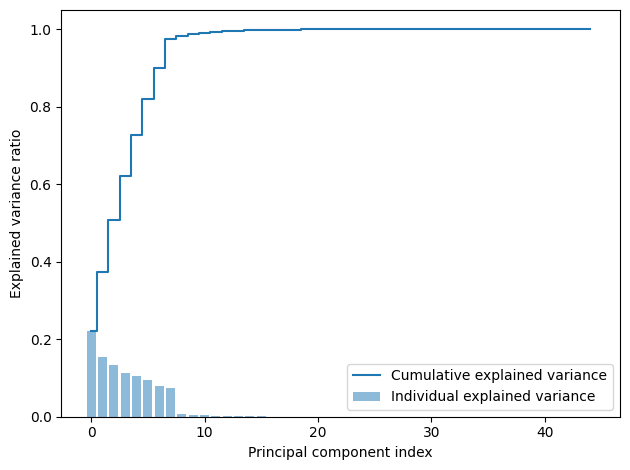

In [17]:
n_components = 45

pca = PCA(n_components=n_components)
#pca.fit(X_train)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
#X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [18]:

dtbase=DecisionTreeClassifier(random_state=20, max_depth=4, criterion="entropy", max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, 
            splitter='best')
gnb = GaussianNB()
rf = RandomForestClassifier(n_estimators=10)

original_models = {
    "Ada Boosting + DecisionTreeClassifier ": AdaBoostClassifier(base_estimator=dtbase),
    #"Ada Boosting + GaussianNB ": AdaBoostClassifier(base_estimator=gnb,learning_rate=1),
    "Ada Boosting + RandomForestClassifier ": AdaBoostClassifier(base_estimator=rf,learning_rate=1)
}



for name, model in original_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")
    result = model.score(X_test_reduced, y_test)
    y_pred = model.predict(X_test_reduced)
    print('Model name: ', name)
    print(f'Accuracy Score: \n{classification_report(y_test,y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')



    """
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": dtbase,
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    """

Ada Boosting + DecisionTreeClassifier  trained.
Model name:  Ada Boosting + DecisionTreeClassifier 
Accuracy Score: 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1640
           1       0.96      0.98      0.97      1660

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300

Area Under Curve: 0.9678004701733763
Accuracy Score: 0.9678787878787879
Ada Boosting + RandomForestClassifier  trained.
Model name:  Ada Boosting + RandomForestClassifier 
Accuracy Score: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1640
           1       0.99      1.00      0.99      1660

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300

Area Under Curve: 0.9945232148104612
Acc